## Classification Metrics

### Hands-On

Let's start with some code generate a synthetic dataset to train a *Logistic Regression* model. Once the model is trained, we will evaluate how well it performs on unseen data set (the test set).

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic classification data, partition into train/test sets, and train a Logistic Regression model.

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

We will use several key metrics:

- **Confusion Matrix**: A table showing true positives, false positives, true negatives, and false negatives.

- **Accuracy**: The overall percentage of correct predictions.

- **Precision & Recall**: Precision measures how many selected items are relevant, while Recall measures how many relevant items are selected.

- **F1 Score** : The harmonic mean of precision and recall, useful when class distribution is uneven.

- **ROC Curve & AUC**: The Receiver Operating Characteristic curve plots the True Positive Rate against the False Positive Rate at various threshold settings. AUC (Area Under the Curve) represents the degree of separability.

In [2]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Generate class predictions (0 or 1) and probability predictions (0.0 to 1.0)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve points and Area Under the Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [3]:
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

Confusion Matrix:
[[ 90   3]
 [  4 103]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96
F1 Score: 0.97
AUC: 0.98


### Accuracy

Accuracy is the most intuitive performance measure. It is simply the ratio of correctly predicted observations to the total observations.

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Observations}} $$

**When to Use**

Accuracy is best used when the target classes are well balanced. However, it can be misleading when dealing with imbalanced datasets.

### Confusion Matrix

A confusion matrix is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known.

**Components**

![confusion-matrix](../assets/confusion-matrix.png)

- True Positive (TP): Correctly predicted positives
- True Negative (TN): Correctly predicted negatives
- False Positive (FP): Incorrectly predicted positives (Type I error)
- False Negative (FN): Incorrectly predicted negatives (Type II error)

**When to Use**

The confusion matrix is not a metric but a helpful tool for computing various metrics and gaining a more detailed insight into where the model is making errors.

### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}} $$

**When to Use**

Use precision when the cost of a false positive is high, such as in spam email detection.

### Recall (also known as True Positve Rate or Sensitivity)

Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

**When to Use**

Use recall when the cost of a false negative is high, such as in fraud detection.

### Specificity (also known as True Negative Rate)

Specificity measures the proportion of actual negatives that are correctly identified as such. It complements recall (sensitivity) by focusing on the model's performance with the negative class.

$$ \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}} $$

**When to Use**

Specificity is particularly important in situations where the cost of a false positive is high. For example, in medical diagnostics, a false positive might lead to unnecessary treatment, which could be costly or harmful.

### F1 Score

The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

$$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

**When to Use**

Use the F1 score when you want to balance precision and recall, especially if there is an uneven class distribution.



## ROC Curve and AUC

The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are powerful tools for evaluating the performance of classification models, particularly in binary classification. They help in visualizing and quantifying the trade-offs between true positive rate (sensitivity) and false positive rate (1 - specificity).

It is created by plotting the TPR against the FPR at different threshold values. A threshold is a point above which a given observation is classified as belonging to the positive class.

![roc-auc](../assets/roc-auc.png)

### Interpretation of the ROC Curve

- A curve near the top-left corner indicates a good performance.
- The diagonal line (FPR = TPR) represents random guessing.
- The area under the diagonal is 0.5, which is the AUC for a random classifier.

**Area Under the Curve (AUC)**

The Area Under the Curve (AUC) represents the degree of separability between the classes. It is used as a summary of the ROC curve.

### Interpretation of AUC

- AUC = 1: Perfect classifier. All positive instances rank higher than all negative instances.
- 0.5 < AUC < 1: Good classifier. Higher AUC indicates better performance.
- AUC = 0.5: Random classifier. No discriminative power.
- AUC < 0.5: Worse than random guessing, but by inverting the predictions, it could be useful.

### Advantages of ROC and AUC

- **Invariance to Class Distribution**: ROC and AUC are useful especially when dealing with imbalanced classes.
- **Threshold Independence**: They measure the quality of the model's predictions without tying to a specific threshold.

**When to Use**

ROC and AUC are useful when you need to evaluate a model's performance across different classification thresholds.

**Visualizing the ROC Curve**

Finally, we visualize the Receiver Operating Characteristic (ROC) curve using Matplotlib. This plot helps us assess the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity).

**The Orange Line**: Represents our model's performance. The closer this curve is to the top-left corner, the better the model is at distinguishing between classes.

**The Dashed Navy Line**: Represents a random classifier (no predictive skill). A good model must curve significantly above this diagonal.

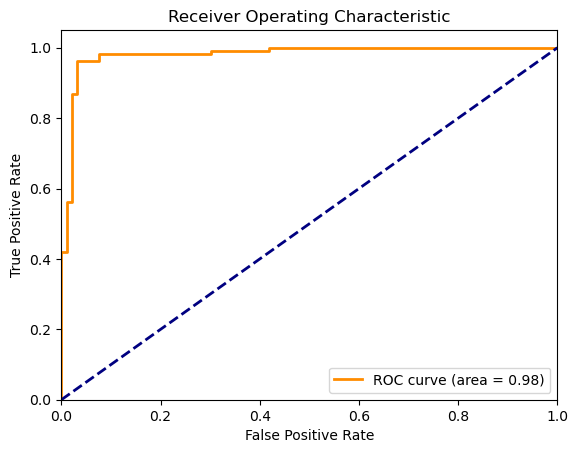

In [4]:
import matplotlib.pyplot as plt

plt.figure()

# Visualize the Receiver Operating Characteristic (ROC) curve against the random baseline.
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot limits, labels, and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Choosing the right metric is crucial for evaluating and improving classification models effectively. It's important to consider the business context and the costs associated with different types of errors when deciding which metric to focus on. By understanding the strengths and limitations of each metric, you can develop more robust and reliable classifiers.

## Regression Metrics

While the previous sections dealt with classification, this block demonstrates how to evaluate Regression models, where the goal is to predict continuous quantities (like price, temperature, or distance) rather than categories.

We define a small set of ground truth values `(y_true)` and model predictions `(y_pred)` to calculate four standard regression metrics:

**MAE (Mean Absolute Error)**: The average magnitude of errors, treating all errors equally.

**MSE (Mean Squared Error)**: The average of squared errors. It penalizes larger errors more severely than MAE.

**RMSE (Root Mean Squared Error)**: The square root of MSE. It brings the error unit back to the original unit of the target variable, making it easier to interpret.

**R² (Coefficient of Determination)**: Represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). A score of 1.0 indicates perfect prediction.

In [5]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define ground truth values and corresponding model predictions
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

# Calculate error metrics
mae = mean_absolute_error(y_true, y_pred)      # Average absolute difference
mse = mean_squared_error(y_true, y_pred)       # Average squared difference
rmse = np.sqrt(mse)                            # Standard deviation of the prediction errors
r2 = r2_score(y_true, y_pred)                  # Goodness of fit (1.0 is perfect)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 0.50
Mean Squared Error (MSE): 0.38
Root Mean Squared Error (RMSE): 0.61
R-squared (R^2): 0.95



### Mean Squared Error (MSE)

Mean Squared Error is the average of the squared differences between the predicted values and the actual values. It gives a higher weight to larger errors.

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

**Interpretation**

- MSE is sensitive to outliers.
- Larger errors have a disproportionately large effect on MSE, making it useful when large errors are particularly undesirable.

### Mean Absolute Error (MAE)

Mean Absolute Error is the average of the absolute differences between the predicted values and the actual values. It gives an idea of how wrong the predictions were.

$$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

**Interpretation**

- MAE is easy to understand and calculate.
- It measures the average magnitude of errors in a set of predictions, without considering their direction.

### Root Mean Squared Error (RMSE)

Root Mean Squared Error is the square root of the mean squared error. It is one of the most widely used metrics for regression tasks.

$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

**Interpretation**

- RMSE is in the same units as the response variable.
- Like MSE, it gives a higher weight to larger errors.

### R-squared (Coefficient of Determination)

R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in a regression model.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

**Interpretation**

- R-squared values range from 0 to 1.
- A higher R-squared value indicates a better fit between prediction and actual value.

### Adjusted R-squared

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.

$$ \text{Adjusted } R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1} $$

where:
- $ n $ is the number of observations
- $ p $ is the number of predictors

**Interpretation**

- Adjusted R-squared penalizes for adding predictors that do not improve the model.
- It's used to compare the explanatory power of regression models that contain different numbers of predictors.